![](https://www.dii.uchile.cl/wp-content/uploads/2021/06/Magi%CC%81ster-en-Ciencia-de-Datos.png)


# Proyecto: Riesgo en el Banco Giturra

### **MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

#### Cuerpo Docente:

- Profesor: Gabriel Iturra, Ignacio Meza De La Jara
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano, Angelo Muñoz

#### Integrantes:

- Nicolás Becerra Pinto
- Simón Sanfeliú Álvarez

### 1. Introducción

### 2. Preparación de Datos

In [150]:
import pandas as pd 
df = pd.read_parquet('dataset.pq')
df.head()

customer_id   age    occupation  annual_income  monthly_inhand_salary  \
0   CUS_0xd40  23.0     Scientist       19114.12            1824.843333   
1  CUS_0x21b1  28.0       Teacher       34847.84            3037.986667   
2  CUS_0x2dbc  34.0      Engineer      143162.64           12187.220000   
3  CUS_0xb891  55.0  Entrepreneur       30689.89            2612.490833   
4  CUS_0x1cdb  21.0     Developer       35547.71            2853.309167   

   num_bank_accounts  num_credit_card  interest_rate  num_of_loan  \
0                  3                4              3          4.0   
1                  2                4              6          1.0   
2                  1                5              8          3.0   
3                  2                5              4       -100.0   
4                  7                5              5       -100.0   

   delay_from_due_date  ...  num_credit_inquiries  outstanding_debt  \
0                    3  ...                   4.0            809.98   
1                    3  ...                   2.0            605.03   
2                    8  ...                   3.0           1303.01   
3                    4  ...                   4.0            632.46   
4                    1  ...                   4.0            943.86   

   credit_utilization_ratio  credit_history_age  payment_of_min_amount  \
0                 23.933795                 NaN                     No   
1                 32.933856                27.0                     No   
2                 38.374753                18.0                     No   
3                 27.332515                17.0                     No   
4                 25.862922                31.0                    Yes   

   total_emi_per_month amount_invested_monthly  \
0            49.574949               24.785217   
1            18.816215              218.904344   
2           246.992319            10000.000000   
3            16.415452              125.617251   
4             0.000000              181.330901   

                  payment_behaviour  monthly_balance credit_score  
0  High_spent_Medium_value_payments       358.124168            0  
1    Low_spent_Small_value_payments       356.078109            0  
2   High_spent_Small_value_payments       895.494583            0  
3   High_spent_Small_value_payments       379.216381            0  
4   High_spent_Small_value_payments       364.000016            0  

[5 rows x 22 columns]

In [151]:
# Creando un dataset sin los ID
data = df.copy()
data = df.drop(columns="customer_id")
data

age     occupation  annual_income  monthly_inhand_salary  \
0      23.0      Scientist       19114.12            1824.843333   
1      28.0        Teacher       34847.84            3037.986667   
2      34.0       Engineer      143162.64           12187.220000   
3      55.0   Entrepreneur       30689.89            2612.490833   
4      21.0      Developer       35547.71            2853.309167   
...     ...            ...            ...                    ...   
12495  19.0         Lawyer       42903.79            3468.315833   
12496  45.0  Media_Manager       16680.35                    NaN   
12497  50.0         Writer       37188.10            3097.008333   
12498  29.0      Architect       20002.88            1929.906667   
12499  25.0       Mechanic       39628.99            3359.415833   

       num_bank_accounts  num_credit_card  interest_rate  num_of_loan  \
0                      3                4              3          4.0   
1                      2                4              6          1.0   
2                      1                5              8          3.0   
3                      2                5              4       -100.0   
4                      7                5              5       -100.0   
...                  ...              ...            ...          ...   
12495                  0                4              6          1.0   
12496                  1                1              5          4.0   
12497                  1                4              5          3.0   
12498                 10                8             29          5.0   
12499                  4                6              7          2.0   

       delay_from_due_date  num_of_delayed_payment  ...  num_credit_inquiries  \
0                        3                     6.0  ...                   4.0   
1                        3                     4.0  ...                   2.0   
2                        8                     6.0  ...                   3.0   
3                        4                     9.0  ...                   4.0   
4                        1                    15.0  ...                   4.0   
...                    ...                     ...  ...                   ...   
12495                    9                     NaN  ...                   1.0   
12496                    1                     0.0  ...                   8.0   
12497                    7                     9.0  ...                   3.0   
12498                   33                    25.0  ...                   9.0   
12499                   18                     6.0  ...                   3.0   

       outstanding_debt  credit_utilization_ratio  credit_history_age  \
0                809.98                 23.933795                 NaN   
1                605.03                 32.933856                27.0   
2               1303.01                 38.374753                18.0   
3                632.46                 27.332515                17.0   
4                943.86                 25.862922                31.0   
...                 ...                       ...                 ...   
12495           1079.48                 35.716618                28.0   
12496            897.16                 41.212367                 NaN   
12497            620.64                 39.300980                30.0   
12498           3571.70                 37.140784                 6.0   
12499            502.38                 34.192463                31.0   

       payment_of_min_amount total_emi_per_month  amount_invested_monthly  \
0                         No           49.574949                24.785217   
1                         No           18.816215               218.904344   
2                         No          246.992319             10000.000000   
3                         No           16.415452               125.617251   
4                        Yes            0.000000               181.330901   
..

In [152]:
# Arreglando datos categóricos
data.occupation = data.occupation.apply(lambda x: 'No_knwon_occupation' if x == '_______' else x)
data.payment_of_min_amount = data.payment_of_min_amount.apply(lambda x: 'No' if x == 'NM' else x)
data.payment_behaviour = data.payment_behaviour.apply(lambda x: 'No_knwon_behaviour' if x == '!@9#%8' else x)

#### 2.1 Preprocesamiento con `ColumnTransformer`

In [153]:
def outlier_thresholds(df, col_name, low_quantile=0.25, up_quantile=0.75):
    Q1=df[col_name].quantile(low_quantile)
    Q3=df[col_name].quantile(up_quantile)
    IQR=Q3-Q1
    low_limit=Q1-1.5*IQR
    up_limit=Q3+1.5*IQR
    return low_limit, up_limit
    

# Let's fill the outliers with the median value of the relevant variable
def replace_with_thresholds(dataframe):
    for variable in dataframe.columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = dataframe[variable].median()
        dataframe.loc[(dataframe[variable] > up_limit), variable] = dataframe[variable].median()

    return dataframe

In [154]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separando los datos en numéricos y categóricos
num_cols = data.corr(numeric_only=True).columns.to_list()
cat_cols = [col for col in data.columns if not col in num_cols]
num_cols.remove("credit_score")

# Atributos numéricos
num_pipe = Pipeline([
                ('Outlier scaler', FunctionTransformer(replace_with_thresholds)),
                ('Standard scaler', StandardScaler())
            ])
# Atributos categóricos
cat_pipe = Pipeline([
    ('Encoder', OrdinalEncoder())
])

# Creando ColumnTransformer
ctrans = ColumnTransformer(
        transformers=[
            ("Categorico", cat_pipe, cat_cols),
            ("Numerico", num_pipe, num_cols),
        ]
)
ctrans.set_output(transform='pandas')

C:\Users\sanfe\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


ColumnTransformer(transformers=[('Categorico',
                                 Pipeline(steps=[('Encoder',
                                                  OrdinalEncoder())]),
                                 ['occupation', 'payment_of_min_amount',
                                  'payment_behaviour']),
                                ('Numerico',
                                 Pipeline(steps=[('Outlier scaler',
                                                  FunctionTransformer(func=<function replace_with_thresholds at 0x0000018F36F99E10>)),
                                                 ('Standard scaler',
                                                  StandardScaler())]),
                                 ['age', 'annual_income',
                                  'monthly_inhand_salary', 'num_bank_accounts',
                                  'num_credit_card', 'interest_rate',
                                  'num_of_loan', 'delay_from_due_date',
                                  'num_of_delayed_payment',
                                  'changed_credit_limit',
                                  'num_credit_inquiries', 'outstanding_debt',
                                  'credit_utilization_ratio',
                                  'credit_history_age', 'total_emi_per_month',
                                  'amount_invested_monthly',
                                  'monthly_balance'])])

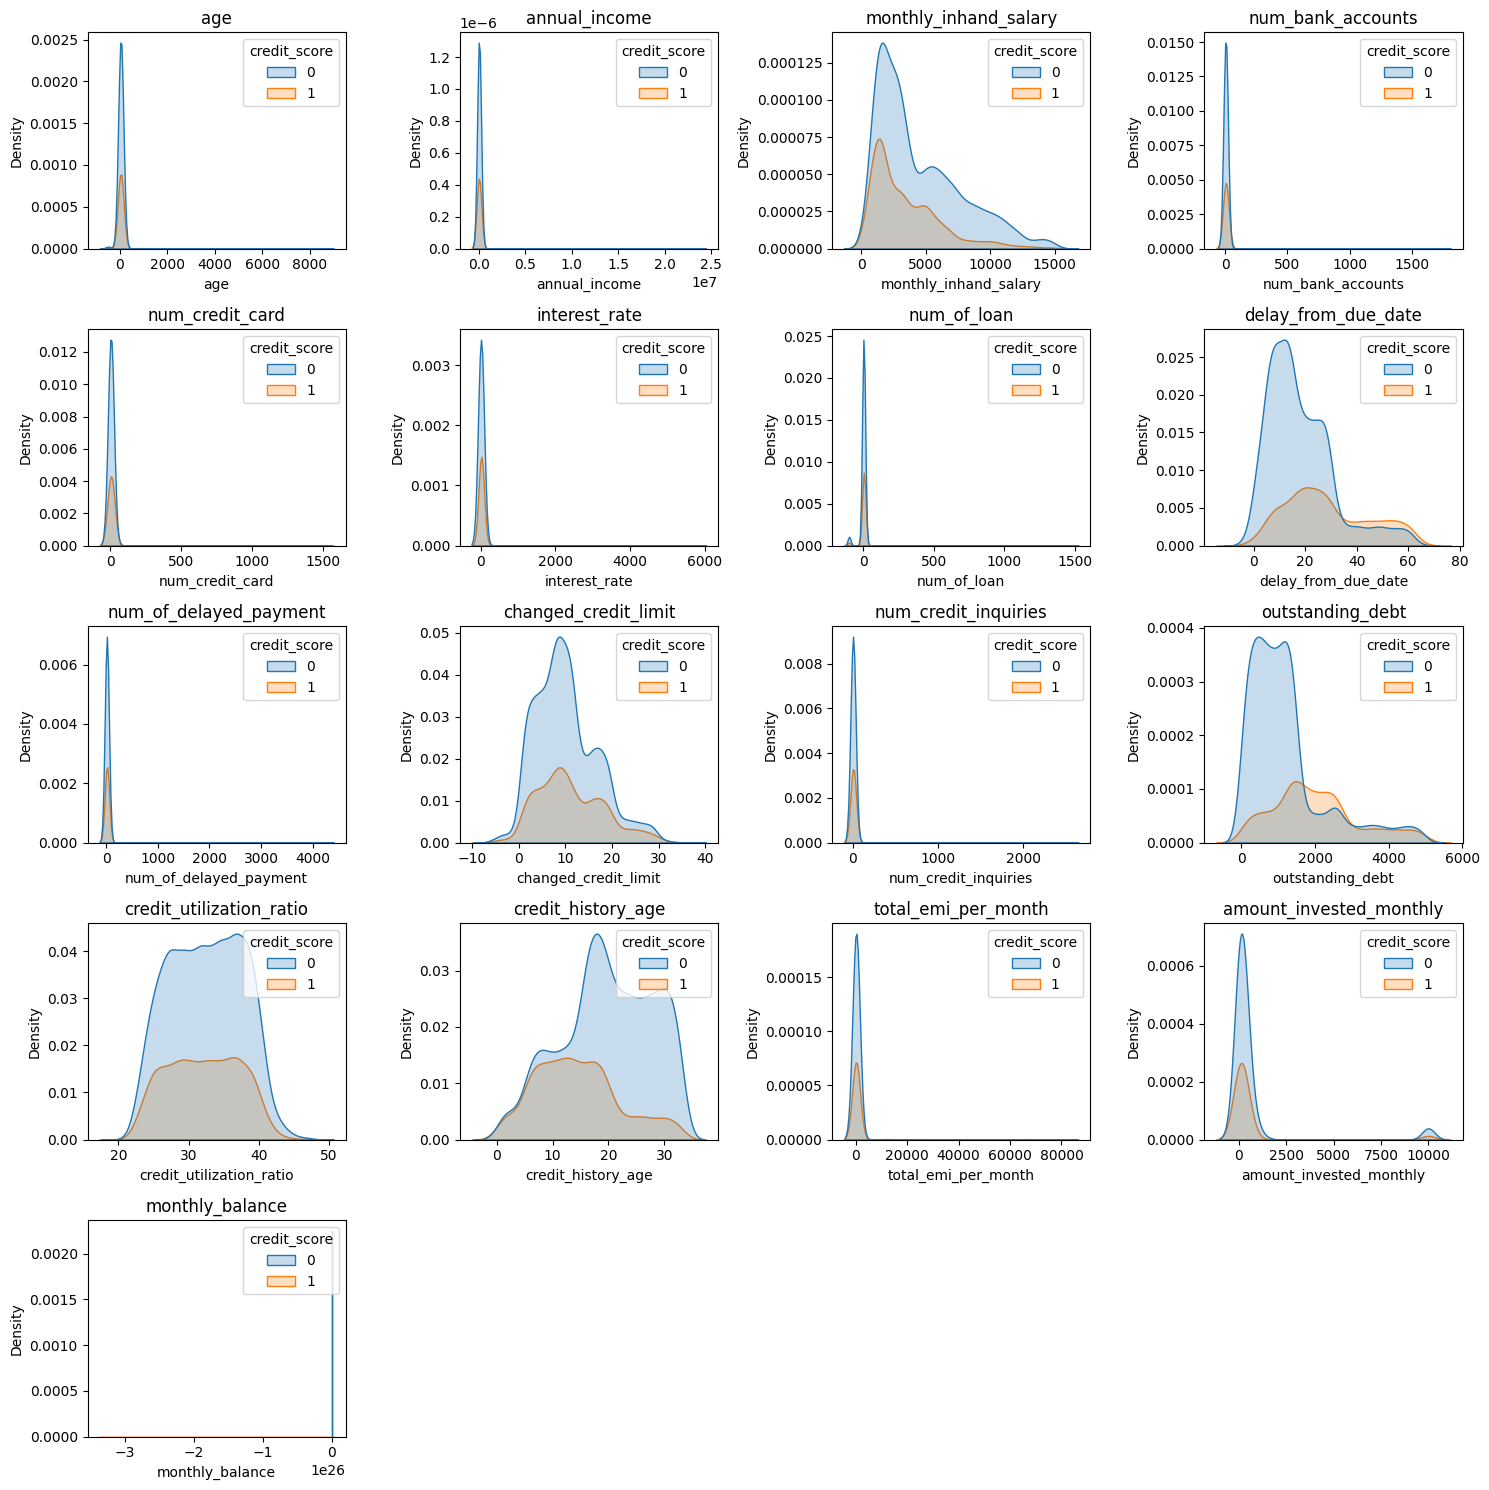

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
for ax, col in enumerate(num_cols):
    plt.subplot(5,4, ax+1)
    plt.title(col)
    sns.kdeplot(x=data[col],fill=True, hue=data["credit_score"], warn_singular=False)

plt.tight_layout()

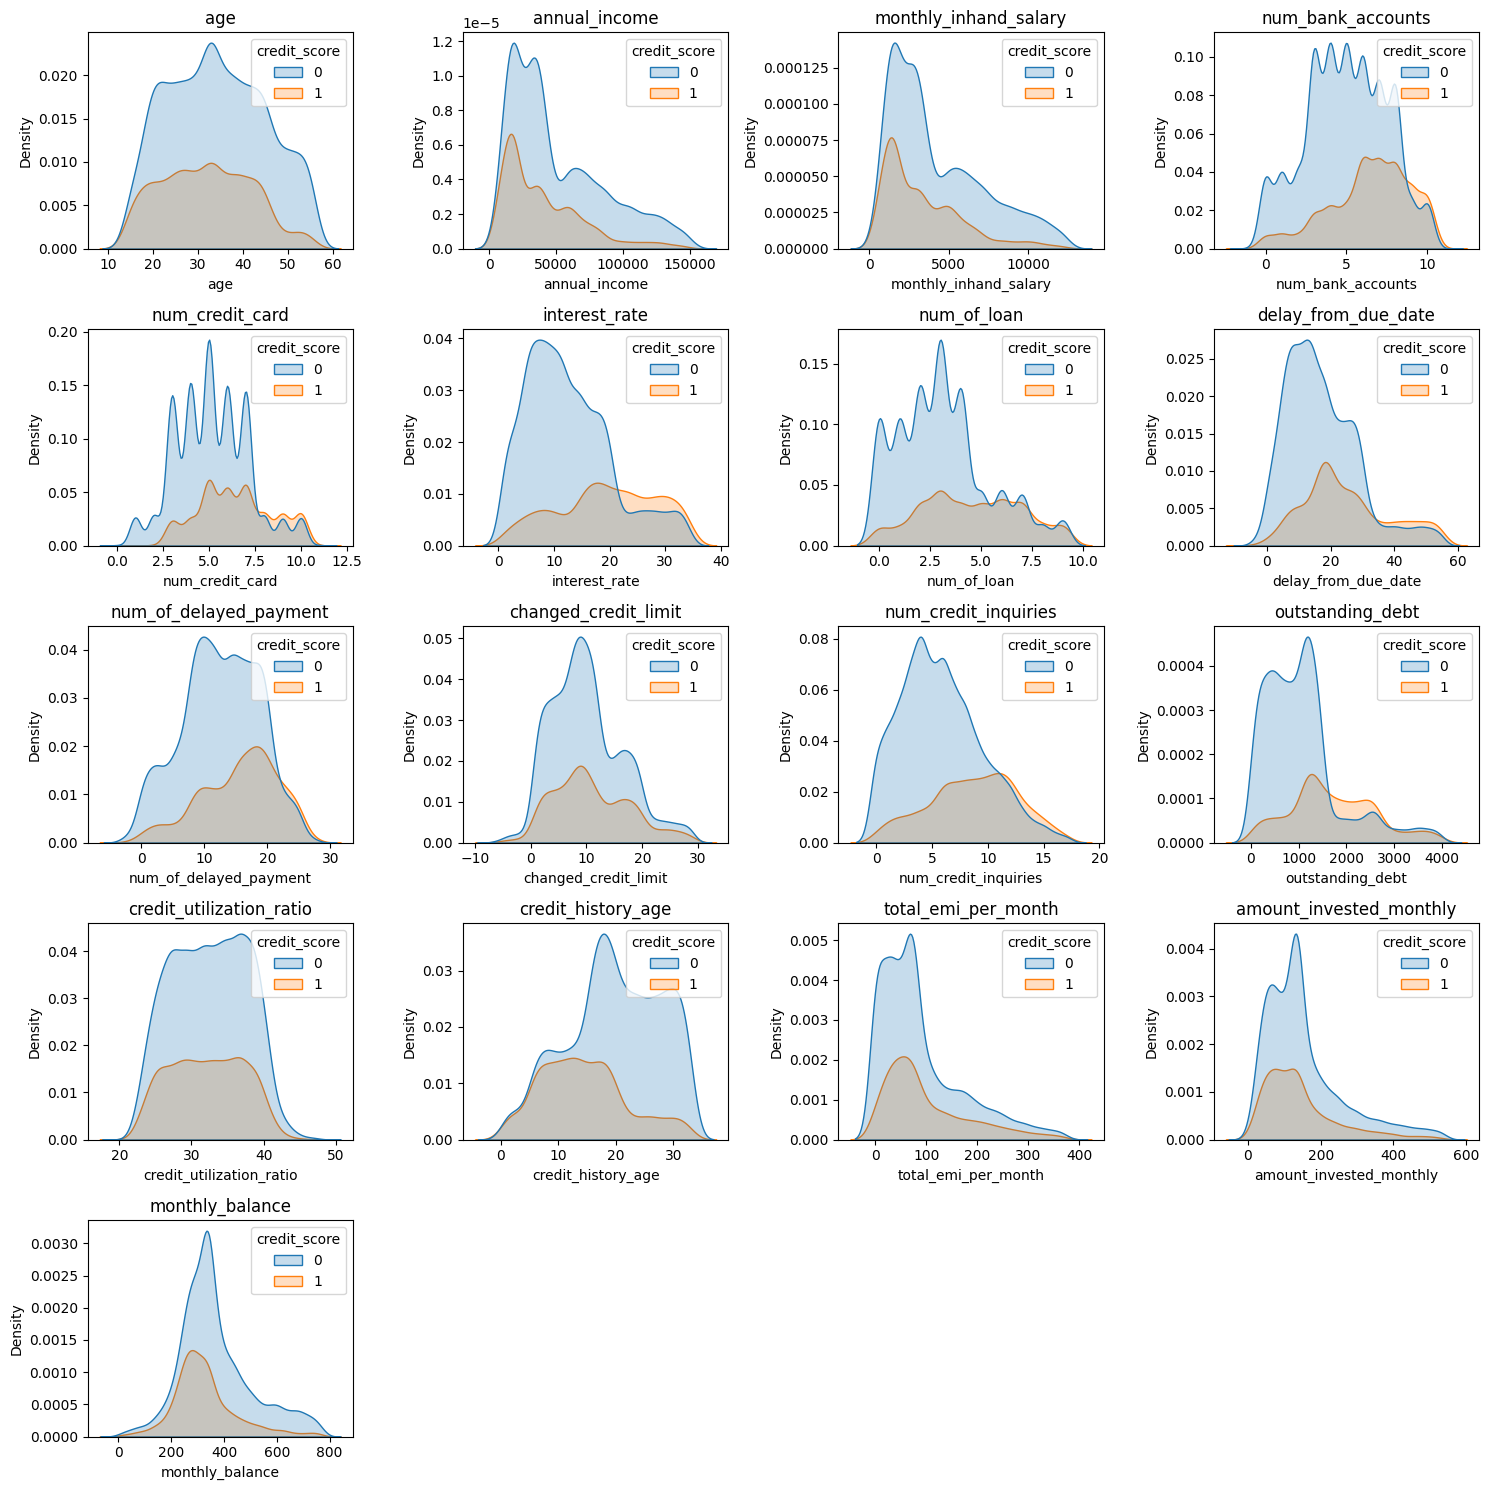

In [156]:
data_copy = data.copy()
data_copy = replace_with_thresholds(data_copy[num_cols])
plt.figure(figsize=(15,15))
for ax, col in enumerate(num_cols):
    plt.subplot(5,4, ax+1)
    plt.title(col)
    sns.kdeplot(x=data_copy[col],fill=True, hue=data["credit_score"], warn_singular=False)

plt.tight_layout()

In [157]:
# Probando
test_data = ctrans.fit_transform(data)
test_data

Categorico__occupation  Categorico__payment_of_min_amount  \
0                        13.0                                0.0   
1                        14.0                                0.0   
2                         4.0                                0.0   
3                         5.0                                0.0   
4                         2.0                                1.0   
...                       ...                                ...   
12495                     7.0                                0.0   
12496                    10.0                                0.0   
12497                    15.0                                0.0   
12498                     1.0                                1.0   
12499                     9.0                                0.0   

       Categorico__payment_behaviour  Numerico__age  Numerico__annual_income  \
0                                1.0      -0.997389                -0.833823   
1                                5.0      -0.527068                -0.380583   
2                                2.0       0.037317                 2.739634   
3                                2.0       2.012665                -0.500360   
4                                2.0      -1.185517                -0.360421   
...                              ...            ...                      ...   
12495                            1.0      -1.373645                -0.148515   
12496                            3.0       1.072023                -0.903932   
12497                            1.0       1.542344                -0.313167   
12498                            0.0      -0.433004                -0.808220   
12499                            6.0      -0.809260                -0.242852   

       Numerico__monthly_inhand_salary  Numerico__num_bank_accounts  \
0                            -0.749958                    -0.919396   
1                            -0.329758                    -1.306921   
2                             2.839294                    -1.694447   
3                            -0.477138                    -1.306921   
4                            -0.393725                     0.630705   
...                                ...                          ...   
12495                        -0.180703                    -2.081972   
12496                              NaN                    -1.694447   
12497                        -0.309314                    -1.694447   
12498                        -0.713567                     1.793281   
12499                        -0.218423                    -0.531871   

       Numerico__num_credit_card  Numerico__interest_rate  \
0                      -0.743524                -1.333257   
1                      -0.743524                -0.986784   
2                      -0.255186                -0.755801   
3                      -0.255186                -1.217766   
4                      -0.255186                -1.102275   
...                          ...                      ...   
12495                  -0.743524                -0.986784   
12496                  -2.208537                -1.102275   
12497                  -0.743524                -1.102275   
12498                   1.209828                 1.669511   
12499                   0.233152                -0.871292   

       Numerico__num_of_loan  Numerico__delay_from_due_date  \
0                   0.207143                      -1.298755   
1                  -1.048373                      -1.298755   
2                  -0.211362                      -0.902710   
3                  -0.211362                      -1.219546   
4                  -0.211362                      -1.457173   
...                      ...                            ...   
12495              -1.048373                      -0.823501   
12496               0.207143                      -1.457173   
12497              -0.211362                      -0.981919   
12498        

#### 2.2 Holdout 

In [159]:
from sklearn.model_selection import train_test_split

# Definiendo la semilla
RANDOM_STATE = 42

# Separación de características y target
X = data.drop(columns="credit_score")
y = data["credit_score"]

# Separando el conjunto de datos (70 / 20 / 10)
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=.3, random_state=RANDOM_STATE, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=.33, random_state=RANDOM_STATE)

#### 2.3 Datos nulos

POR QUÉ LOS IMPUTMOS POR LA MEDIANA?

#### 2.4 Feature Engineering [Bonus]

### 3. Baseline

In [131]:
%%capture
!pip install -qq xgboost lightgbm

In [187]:
# Importando clasificadores
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

# Clasificadores a probar
classifiers = [
    ("Dummy", DummyClassifier(strategy='stratified')),
    ("Regression", LogisticRegression()),
    ("KNN", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("SVM", SVC()),
    ("Random Forest", RandomForestClassifier()),
    ("LightGBM", LGBMClassifier()),
    ("XGBoost", XGBClassifier())
]

# Ciclo para probar todos los clasificadores
results = {"Classifier": [], "Macro Average F1-Score": []}
for name, clf in classifiers:
    # Pipeline
    pipe = Pipeline([
        ("Scaling", ctrans),
        ("Imputer", SimpleImputer(strategy="median")),
        ("Classifier", clf)
    ])

    # Entrenamiento
    model = pipe.fit(X_train, y_train)

    # Predicción en validación
    pred = model.predict(X_val)

    print("----------------")
    print("Resultados para clasificador: ", name)
    print(classification_report(y_val, pred))
    print("----------------\n\n")

    # Guardando las métricas por clasificador
    results["Classifier"].append(name)
    results["Macro Average F1-Score"].append(round(classification_report(y_val, pred, output_dict=True)["macro avg"]["f1-score"], 2))

----------------
Resultados para clasificador:  Dummy
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1782
           1       0.30      0.30      0.30       730

    accuracy                           0.59      2512
   macro avg       0.50      0.50      0.50      2512
weighted avg       0.59      0.59      0.59      2512

----------------


----------------
Resultados para clasificador:  Regression
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1782
           1       0.61      0.42      0.50       730

    accuracy                           0.75      2512
   macro avg       0.70      0.66      0.67      2512
weighted avg       0.74      0.75      0.74      2512

----------------


----------------
Resultados para clasificador:  KNN
              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1782
           1       0.60      0.44 

In [195]:
results_df = pd.DataFrame.from_dict(results)
results_df.sort_values(by="Macro Average F1-Score", ascending=False, inplace=True)
results_df.reset_index(drop=True)

Classifier  Macro Average F1-Score
0  Random Forest                    0.71
1       LightGBM                    0.71
2            SVM                    0.69
3        XGBoost                    0.69
4     Regression                    0.67
5            KNN                    0.67
6  Decision Tree                    0.64
7          Dummy                    0.50

AGREGAR EXPLICACIONES

### 4. Optimización del Modelo

In [198]:
# Creando la optimización con Optuna
def objective_RF(trial):
    """
    Función objetivo para optimizar los hiperparámetros del modelo. Utiliza la libreria Optuna.

    Parameters
    ----------
    trial : optuna.trial._trial.Trial
        Objeto de la clase Trial de Optuna.

    Returns
    -------
    mae_opt : float
        Error absoluto medio del modelo optimizado. Es el valor que se intenta minimizar.
    """
    # Agregando valores a probar
    strategy = trial.suggest_categorical("strategy", ["mean", "median", "most_frequent", "constant"])
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    criterion = trial.suggest_categorical("criterion", ['gini', 'entropy', 'log_loss'])
    max_depth = trial.suggest_int('max_depth', 1, 10)

    # Pipeline
    pipe = Pipeline([
        ("Scaling", ctrans),
        ("Imputer", SimpleImputer(strategy=strategy)),
        ("Classifier", RandomForestClassifier(
            n_estimators=n_estimators,
            criterion=criterion,
            max_depth=max_depth,
            random_state=RANDOM_STATE
        ))
    ])

    # Entrenamiento
    model = pipe.fit(X_train, y_train)

    # Predicción en validación
    pred = model.predict(X_val)

    # Obteniendo el Macro Average F1-Score
    macro_avg_f1 = classification_report(y_val, pred, output_dict=True)["macro avg"]["f1-score"]

    return macro_avg_f1

In [199]:
import optuna

# Seteando semilla de optuna
optuna_seed = 0

# Sampler
sampler = optuna.samplers.TPESampler(seed=optuna_seed)

# Generando el estudio de hiperparámetros
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective_RF, timeout=300)  # 5 min de entrenamiento

[I 2023-12-18 01:34:50,921] A new study created in memory with name: no-name-21938988-b880-423b-a33e-b14f8167aad4
[I 2023-12-18 01:35:21,720] Trial 0 finished with value: 0.70772713064796 and parameters: {'strategy': 'median', 'n_estimators': 269, 'criterion': 'log_loss', 'max_depth': 10}. Best is trial 0 with value: 0.70772713064796.
[I 2023-12-18 01:36:14,165] Trial 1 finished with value: 0.7078661278807016 and parameters: {'strategy': 'median', 'n_estimators': 471, 'criterion': 'entropy', 'max_depth': 9}. Best is trial 1 with value: 0.7078661278807016.
[I 2023-12-18 01:36:20,951] Trial 2 finished with value: 0.6076826043684889 and parameters: {'strategy': 'most_frequent', 'n_estimators': 285, 'criterion': 'gini', 'max_depth': 2}. Best is trial 1 with value: 0.7078661278807016.
[I 2023-12-18 01:36:53,438] Trial 3 finished with value: 0.7048219090806486 and parameters: {'strategy': 'mean', 'n_estimators': 410, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 1 with value: 0.7078

In [200]:
# Obteniendo las herramientas gráficas
from optuna.visualization import plot_optimization_history, plot_parallel_coordinate, plot_param_importances

# Gráfico de historial de optimización
plot_optimization_history(study, target_name="Macro Average F1-Score")

In [201]:
# Gráfico de coordenadas paralelas
plot_parallel_coordinate(study, target_name="Macro Average F1-Score")

In [202]:
# Gráfico de importancia de hiperparámetros
plot_param_importances(study, target_name="Macro Average F1-Score")

#### Bonus

1. **Visualización con Optuna** [0.2 extras]: Explore la documentación de visualización de Optuna en el siguiente [link](https://optuna.readthedocs.io/en/stable/reference/visualization/index.html) y realice un análisis sobre el proceso de optimización de hiperparámetros realizado.
2. **Imbalanced learn** [0.3 extras]: Al ser el problema desbalanceado, pueden probar técnicas para balancear automáticamente el dataset previo a ejecutar el modelo. Para esto, puede probar con los mecanismos implementados en la librería [Imbalanced learn](https://imbalanced-learn.org/). 
3. **Probar pycaret (AutoML)** [0.3 extras]: Pueden probar la librería [pycaret](https://pycaret.org/) para realizar un proceso de AutoML. Para esto, pueden utilizar el siguiente [tutorial](https://pycaret.org/classification/).

### 5. Interpretabilidad 

### 6. Conclusiones

### 7. Bonus: Implementación de Kedro y FastAPI